In [97]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from datetime import date, datetime
from scipy import stats
import pickle

# Import the Dataset

In [98]:
train_set = pd.read_csv("flight data.csv")

In [99]:
train_set.head(50)

,from_airport_code,from_country,dest_airport_code,dest_country,aircraft_type,airline_number,airline_name,flight_number,departure_time,arrival_time,duration,stops,price,currency,co2_emissions,avg_co2_emission_for_this_route,co2_percentage,scan_date
0,ALG,Algeria,AEP,Argentina,Airbus A318|Canadair RJ 1000|Airbus A330|Airbu...,multi,[Air France| Iberia| LATAM],AF1491|AF1491|AF1491|AF1491,2022-04-30 14:30:00,2022-05-01 10:15:00,1425,3,1279.0,USD,1320000.0,1320000.0,0%,2022-04-29 17:52:59
1,ALG,Algeria,AEP,Argentina,Airbus A318|Canadair RJ 1000|Boeing 787|Airbus...,multi,[Air France| Iberia| LATAM],AF1491|AF1491|AF1491|AF1491,2022-04-30 14:30:00,2022-05-01 10:15:00,1425,3,1279.0,USD,1195000.0,1320000.0,-9%,2022-04-29 17:52:59
2,ALG,Algeria,AEP,Argentina,Airbus A320|Airbus A321|Boeing 787|Airbus A320,multi,[Air France| LATAM],AF1855|AF1855|AF1855|AF1855,2022-04-30 12:45:00,2022-05-01 10:15:00,1530,3,1284.0,USD,1248000.0,1320000.0,-5%,2022-04-29 17:52:59
3,ALG,Algeria,AEP,Argentina,Airbus A318|Airbus A320|Boeing 787|Airbus A320,multi,[Air France| LATAM],AF1491|AF1491|AF1491|AF1491,2022-04-30 14:30:00,2022-05-01 10:15:00,1425,3,1290.0,USD,1347000.0,1320000.0,2%,2022-04-29 17:52:59
4,ALG,Algeria,AEP,Argentina,Airbus A321neo|Boeing 777|Airbus A320,multi,[Lufthansa| LATAM],LH1317|LH1317|LH1317,2022-04-30 12:35:00,2022-05-01 10:15:00,1540,2,1347.0,USD,1381000.0,1320000.0,4%,2022-04-29 17:52:59
5,ALG,Algeria,AEP,Argentina,Airbus A318|Canadair RJ 1000|Airbus A330|Airbu...,multi,[Air France| Iberia| LATAM],AF1491|AF1491|AF1491|AF1491,2022-04-30 14:30:00,2022-05-01 16:50:00,1820,3,1279.0,USD,1320000.0,1320000.0,0%,2022-04-29 17:52:59
6,ALG,Algeria,AEP,Argentina,Airbus A318|Canadair RJ 1000|Boeing 787|Airbus...,multi,[Air France| Iberia| LATAM],AF1491|AF1491|AF1491|AF1491,2022-04-30 14:30:00,2022-05-01 16:50:00,1820,3,1279.0,USD,1195000.0,1320000.0,-9%,2022-04-29 17:52:59
7,ALG,Algeria,AEP,Argentina,Airbus A320|Airbus A321|Airbus A330|Airbus A320,multi,[Air France| Iberia| LATAM],AF1855|AF1855|AF1855|AF1855,2022-04-30 12:45:00,2022-05-01 10:15:00,1530,3,1284.0,USD,1373000.0,1320000.0,4%,2022-04-29 17:52:59
8,ALG,Algeria,AEP,Argentina,Airbus A320|Airbus A321|Airbus A330|Airbus A320,multi,[Air France| Iberia| LATAM],AF1855|AF1855|AF1855|AF1855,2022-04-30 12:45:00,2022-05-01 16:50:00,1925,3,1284.0,USD,1373000.0,1320000.0,4%,2022-04-29 17:52:59
9,ALG,Algeria,AEP,Argentina,Airbus A320|Airbus A321|Boeing 787|Airbus A320,multi,[Air France| LATAM],AF1855|AF1855|AF1855|AF1855,2022-04-30 12:45:00,2022-05-01 16:50:00,1925,3,1284.0,USD,1248000.0,1320000.0,-5%,2022-04-29 17:52:59


In [100]:
train_set.describe()

,duration,stops,price,co2_emissions,avg_co2_emission_for_this_route
count,998866.000000,998866.000000,997513.000000,9.939980e+05,9.104640e+05
mean,1468.213762,1.654926,1763.370116,1.111010e+06,8.626045e+05
std,705.799677,0.652485,1985.988209,9.876891e+05,5.228906e+05
min,55.000000,0.000000,9.000000,4.300000e+04,5.300000e+04
25%,973.000000,1.000000,621.000000,5.220000e+05,4.100000e+05
50%,1410.000000,2.000000,1189.000000,9.560000e+05,8.760000e+05
75%,1880.000000,2.000000,2127.000000,1.367000e+06,1.184000e+06
max,6095.000000,6.000000,33750.000000,1.404400e+07,2.408000e+06


In [101]:
train_set.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 998866 entries, 0 to 998865
Data columns (total 18 columns):
 #   Column                           Non-Null Count   Dtype  
---  ------                           --------------   -----  
 0   from_airport_code                998866 non-null  object 
 1   from_country                     998866 non-null  object 
 2   dest_airport_code                998866 non-null  object 
 3   dest_country                     998866 non-null  object 
 4   aircraft_type                    984952 non-null  object 
 5   airline_number                   998866 non-null  object 
 6   airline_name                     998866 non-null  object 
 7   flight_number                    998866 non-null  object 
 8   departure_time                   998866 non-null  object 
 9   arrival_time                     998866 non-null  object 
 10  duration                         998866 non-null  int64  
 11  stops                            998866 non-null  int64  
 12  pr

In [102]:
# Check for Null values
train_set.isnull().sum()

from_airport_code                      0
from_country                           0
dest_airport_code                      0
dest_country                           0
aircraft_type                      13914
airline_number                         0
airline_name                           0
flight_number                          0
departure_time                         0
arrival_time                           0
duration                               0
stops                                  0
price                               1353
currency                               0
co2_emissions                       4868
avg_co2_emission_for_this_route    88402
co2_percentage                     88402
scan_date                              0
dtype: int64

# Data Cleaning

Deal with empty & NaN values and converting relevant datatypes

In [103]:
# Fill empty and NaNs values with NaN
train_set['co2_percentage'] = train_set['co2_percentage'].str.rstrip('%')
train_set['co2_percentage'] = train_set['co2_percentage'].replace('None', np.nan)


In [104]:
# Fill empty and NaNs values with "0" and changing datatype to float
train_set['co2_percentage'] =train_set['co2_percentage'].fillna("0")
train_set['co2_percentage'] = train_set['co2_percentage'].astype("float")

train_set['co2_emissions'] =train_set['co2_percentage'].fillna("0")
train_set['co2_emissions'] = train_set['co2_percentage'].astype("float")

train_set['avg_co2_emission_for_this_route'] =train_set['co2_percentage'].fillna("0")
train_set['avg_co2_emission_for_this_route'] = train_set['co2_percentage'].astype("float")



In [105]:
# Converting the date and time columns from object to datetime datatypes

train_set['departure_time'] = train_set['departure_time'].apply(lambda x: datetime.strptime(x, '%Y-%m-%d %H:%M:%S'))
train_set['arrival_time'] = train_set['arrival_time'].apply(lambda x: datetime.strptime(x, '%Y-%m-%d %H:%M:%S'))
train_set['scan_date'] = train_set['scan_date'].apply(lambda x: datetime.strptime(x, '%Y-%m-%d %H:%M:%S'))

# Data Processing

In [106]:
# Extracting day, month, hour and minute from departure time column
train_set ['depature_day'] = train_set["departure_time"].dt.day
train_set ['depature_month'] = train_set["departure_time"].dt.month
train_set ['departure_hour']= train_set["departure_time"].dt.hour
train_set ['departure_min']= train_set["departure_time"].dt.minute

# Drop the departure_time column as it's no longer useful
train_set.drop(["departure_time"], axis = 1, inplace = True)

In [107]:
# Extracting day, month, hour and minute from arrival time column

train_set ['arrival_day'] = train_set["arrival_time"].dt.day
train_set ['arrival_month'] = train_set["arrival_time"].dt.month
train_set ['arrival_hour']= train_set["arrival_time"].dt.hour
train_set ['arrival_min']= train_set["arrival_time"].dt.minute



In [108]:
# Create new column for flight paths
train_set['flight_path'] = train_set["from_airport_code"] + "-" + train_set["dest_airport_code"]

In [109]:
# Function to count number of Airline names in a travel
def count_elements(df):
    return len(df.split("|"))
# Function to seperate Airline names involed in a travel
def seperate_elements(df):
    return df.split("|")
#Format airline_name function
train_set['airline_name'] = train_set["airline_name"].str.strip('[]')

#Applying above function on airline_name column
train_set ['number_of_airlines'] = train_set['airline_name'].apply(count_elements)
train_set['airline_names'] = train_set['airline_name'].apply(seperate_elements)


In [110]:
# Functions to return departure and arrival flights

def departure(df):
    return df[0]

def arrival(df):
    if len(df) > 2:
        return df[2]
    elif len(df) >1 :
        return df[1]
    else:
        return df[0]
    
#Applying above function on airline_names column
train_set['departure_airline'] = train_set['airline_names'].apply(departure).str.strip()

train_set['arrival_airline'] = train_set['airline_names'].apply(arrival).str.strip()



In [111]:
train_set['arrival_airline'].unique()

array(['LATAM', 'Aerolineas Argentinas', 'Malaysia Airlines',
       'Singapore Airlines', 'Qatar Airways', 'Asiana', 'THAI',
       'Emirates', 'Etihad', 'British Airways', 'Jetstar', 'Qantas',
       'Air India', 'JAL', 'Virgin Australia', 'Korean Air', 'Paranair',
       'Gol', 'SriLankan', 'Air France', 'Austrian', 'Turkish Airlines',
       'Lufthansa', 'Eurowings', 'Iberia', 'Air Canada', 'United',
       'SWISS', 'Tunisair', 'Brussels Airlines', 'KLM', 'Croatia',
       'Transavia', 'LOT', 'ITA', 'Vueling', 'EgyptAir', 'WestJet',
       'Delta', 'Aer Lingus', 'American', 'Azul', 'Avianca',
       'China Southern', 'ANA', 'COPA', 'SAS', 'Ethiopian', 'Saudia',
       'MEA', 'Royal Jordanian', 'Aegean', 'ASL Airlines', 'Air Dolomiti',
       'SNCF', 'IndiGo', 'Vistara', 'Oman Air', 'Air Serbia',
       'Kuwait Airways', 'flydubai', 'Garuda Indonesia', 'Gulf Air',
       'Luxair', 'Kenya Airways', 'Aeromexico', 'Royal Air Maroc',
       'Finnair', 'Wideroe', 'Air Baltic', 'Eurowings

In [112]:
# Functions to define departure and arrival period of flights

def period(df):
    if df in range(18,24):
        return "Night"
    elif df in range(0,12):
        return "Morning"
    else:
        return "Afternoon"
    
#Applying above function on arrival_hour and departure_hour columns
train_set["arrival_period"] = train_set['arrival_hour'].apply(period)
train_set["departure_period"] = train_set['departure_hour'].apply(period)

In [113]:
# Functions to encode departure and arrival period of flights

def is_morning(df):
    if df in range(0,12):
        return 1
    else:
        return 0
    
def is_afternoon(df):
    if df in range(12,18):
        return 1
    else:
        return 0
    
def is_night(df):
    if df in range(18,24):
        return 1
    else:
        return 0
    
 #Applying above function on arrival_hour and departure_hour columns 

train_set['is_morning_departure'] = train_set['departure_hour'].apply(is_morning)
train_set['is_afternoon_departure'] = train_set['departure_hour'].apply(is_afternoon)
train_set['is_night_departure'] = train_set['departure_hour'].apply(is_night)


train_set['is_morning_arrival'] = train_set['arrival_hour'].apply(is_morning)
train_set['is_afternoon_arrival'] = train_set['arrival_hour'].apply(is_afternoon)
train_set['is_night_arrival'] = train_set['arrival_hour'].apply(is_night)


In [114]:
# Creating column that counts number of flights that leave and enter a country
fro = train_set['from_country'].value_counts()
fro = fro.to_dict()
train_set['from_country_freq'] = train_set['from_country'].map(fro) 

dest = train_set['dest_country'].value_counts()
dest = dest.to_dict()
train_set['dest_country_freq'] = train_set['dest_country'].map(dest) 


In [115]:
# Creating column that counts number times a flights path is travelled
path = train_set['flight_path'].value_counts()
path = path.to_dict()
train_set['path_freq'] = train_set['flight_path'].map(path) 


In [116]:
# Creating column that counts number of time an airline departs airports
z = train_set['departure_airline'].value_counts()
z1 = z.to_dict() 
train_set['departure_airline_freq'] = train_set['departure_airline'].map(z1) 

# Creating column that counts number of time an airline arrives airports
y = train_set['arrival_airline'].value_counts()
y1 = y.to_dict() 
train_set['arrival_airline_freq'] = train_set['arrival_airline'].map(y1) 

In [117]:
# Creating column that counts number of time an airplane departs a country
x = train_set['from_country'].value_counts()
x1 = x.to_dict() 
train_set['from_country_freq'] = train_set['from_country'].map(x1) 

# Creating column that counts number of time an airplane arrives a country
w = train_set['dest_country'].value_counts()
w1 = w.to_dict() 
train_set['dest_country_freq'] = train_set['dest_country'].map(w1) 

In [118]:
train_set.head()

,from_airport_code,from_country,dest_airport_code,dest_country,aircraft_type,airline_number,airline_name,flight_number,arrival_time,duration,...,is_afternoon_departure,is_night_departure,is_morning_arrival,is_afternoon_arrival,is_night_arrival,from_country_freq,dest_country_freq,path_freq,departure_airline_freq,arrival_airline_freq
0,ALG,Algeria,AEP,Argentina,Airbus A318|Canadair RJ 1000|Airbus A330|Airbu...,multi,Air France| Iberia| LATAM,AF1491|AF1491|AF1491|AF1491,2022-05-01 10:15:00,1425,...,1,0,1,0,0,15737,12440,362,33263,37624
1,ALG,Algeria,AEP,Argentina,Airbus A318|Canadair RJ 1000|Boeing 787|Airbus...,multi,Air France| Iberia| LATAM,AF1491|AF1491|AF1491|AF1491,2022-05-01 10:15:00,1425,...,1,0,1,0,0,15737,12440,362,33263,37624
2,ALG,Algeria,AEP,Argentina,Airbus A320|Airbus A321|Boeing 787|Airbus A320,multi,Air France| LATAM,AF1855|AF1855|AF1855|AF1855,2022-05-01 10:15:00,1530,...,1,0,1,0,0,15737,12440,362,33263,37624
3,ALG,Algeria,AEP,Argentina,Airbus A318|Airbus A320|Boeing 787|Airbus A320,multi,Air France| LATAM,AF1491|AF1491|AF1491|AF1491,2022-05-01 10:15:00,1425,...,1,0,1,0,0,15737,12440,362,33263,37624
4,ALG,Algeria,AEP,Argentina,Airbus A321neo|Boeing 777|Airbus A320,multi,Lufthansa| LATAM,LH1317|LH1317|LH1317,2022-05-01 10:15:00,1540,...,1,0,1,0,0,15737,12440,362,150304,37624


# Data Visualization

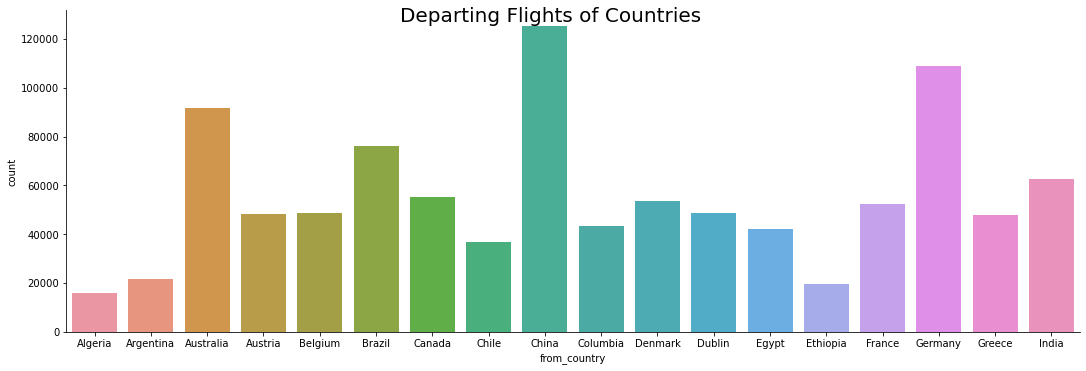

<Figure size 2880x2304 with 0 Axes>

In [119]:
# Plot to show frequency of flights out of country
av = sns.catplot( x = "from_country", data = train_set.sort_values("from_country", ascending = True), kind="count", height = 5, aspect = 3)
av.fig.suptitle("Departing Flights of Countries", size = 20)
plt.figure(figsize = (40,32))
plt.show()

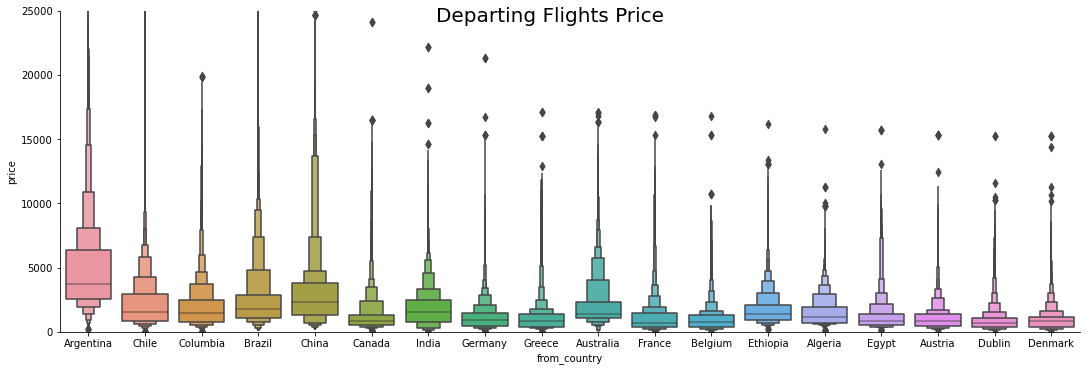

In [120]:
# Plot to show price distribution of flights out of country
av = sns.catplot(y = "price", x = "from_country", data = train_set.sort_values("price", ascending = False), kind="boxen", height = 5, aspect = 3)
av.fig.suptitle("Departing Flights Price", size = 20)
plt.ylim(0,25000)
plt.show()

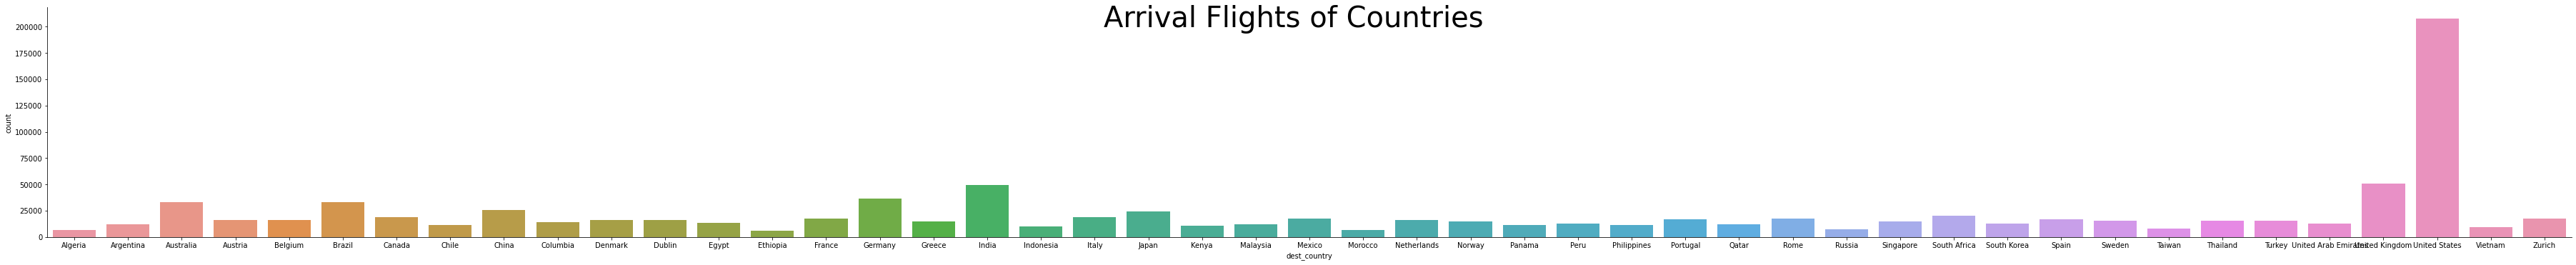

<Figure size 2880x2304 with 0 Axes>

In [121]:
# Plot to show frequency of flights into country
av = sns.catplot( x = "dest_country", data = train_set.sort_values("dest_country", ascending = True), kind="count", height = 5, aspect = 10)
av.fig.suptitle("Arrival Flights of Countries", size = 40)
plt.figure(figsize = (40,32))
plt.show()

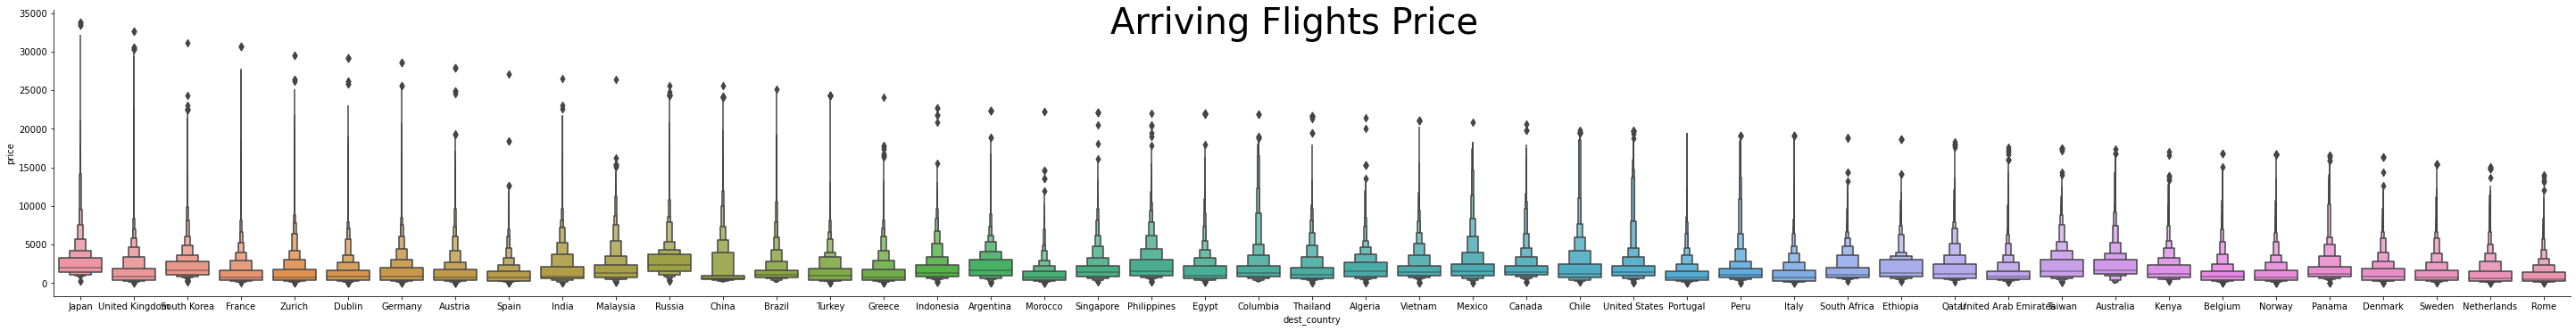

<Figure size 2880x2304 with 0 Axes>

In [122]:
# Plot to show price distribution of flights into country
av = sns.catplot(y = "price", x = "dest_country", data = train_set.sort_values("price", ascending = False), kind="boxen", height = 5, aspect = 8)
av.fig.suptitle("Arriving Flights Price", size = 40)
plt.figure(figsize = (40,32))
plt.show()

In [123]:
# Calculate average price for number of stops
stops_data = train_set.groupby(by=['stops'])[["price"]].mean()
stops_data = stops_data.reset_index()

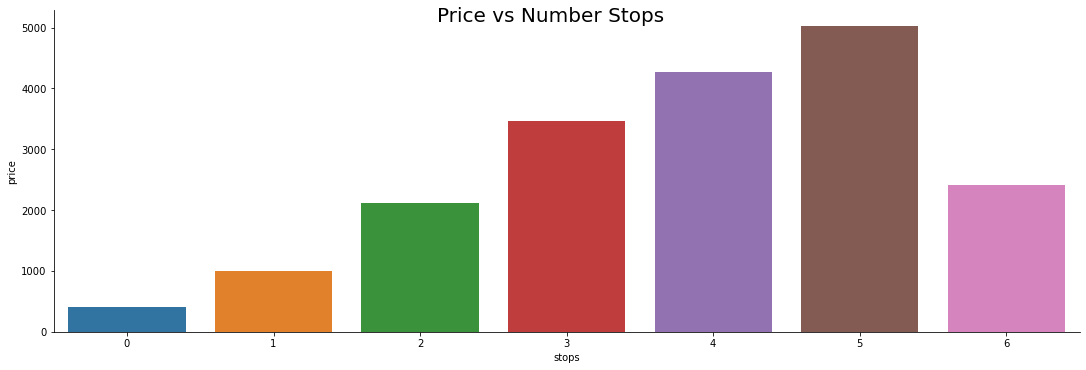

<Figure size 2880x2304 with 0 Axes>

In [124]:
# Plot to show average price for number of stops
av = sns.catplot(y = "price", x = "stops", data = stops_data.sort_values("price", ascending = False), kind="bar", height = 5, aspect = 3)
av.fig.suptitle("Price vs Number Stops", size = 20)
plt.figure(figsize = (40,32))
plt.show()

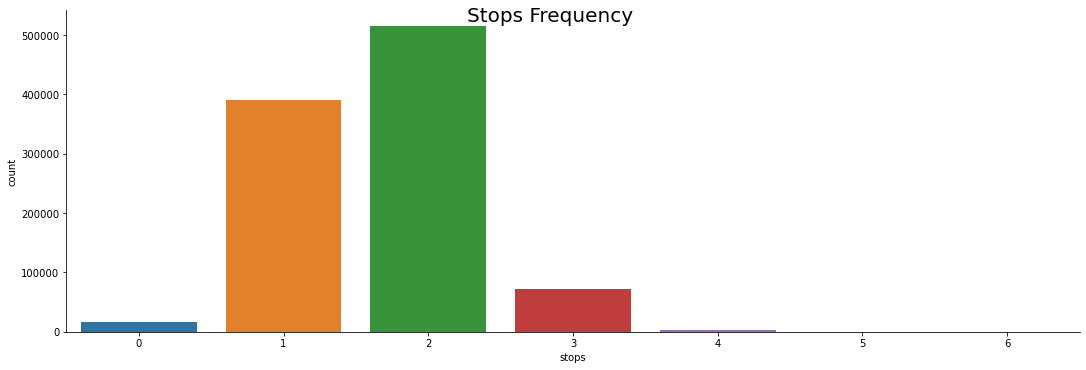

<Figure size 2880x2304 with 0 Axes>

In [125]:
# Plot to show frequency for number of stops
av = sns.catplot( x = "stops", data = train_set.sort_values("stops", ascending = False), kind="count", height = 5, aspect = 3)
av.fig.suptitle("Stops Frequency", size = 20)
plt.figure(figsize = (40,32))
plt.show()

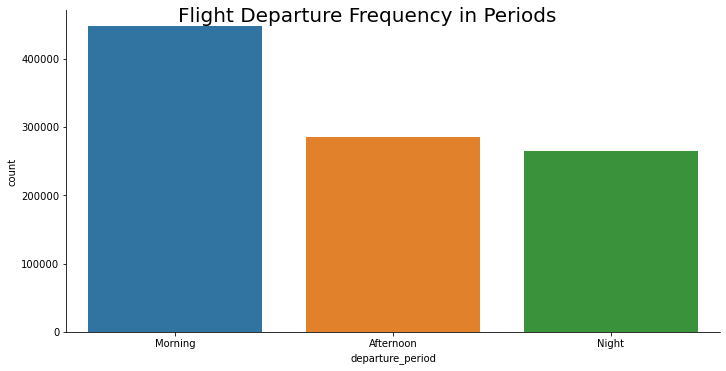

<Figure size 2880x2304 with 0 Axes>

In [126]:
# Plot to show frequency for flight departure periods
av = sns.catplot( x = "departure_period", data = train_set.sort_values("price", ascending = False), kind="count", height = 5, aspect = 2)
av.fig.suptitle("Flight Departure Frequency in Periods ", size = 20)
plt.figure(figsize = (40,32))
plt.show()

In [127]:
# Calculate average price for flight departure periods
d_period_data = train_set.groupby(by=['departure_period'])[["price"]].mean()
d_period_data = d_period_data.reset_index()

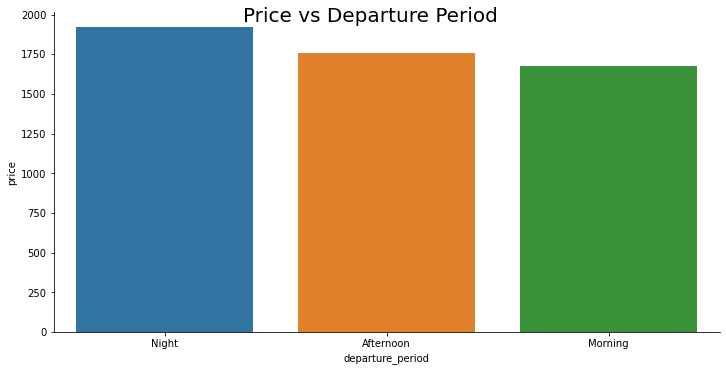

<Figure size 2880x2304 with 0 Axes>

In [128]:
# Plot to show average price for flight departure periods
av = sns.catplot(y = "price", x = 'departure_period', data = d_period_data.sort_values("price", ascending = False), kind="bar", height = 5, aspect = 2)
av.fig.suptitle("Price vs Departure Period", size = 20)
plt.figure(figsize = (40,32))
plt.show()

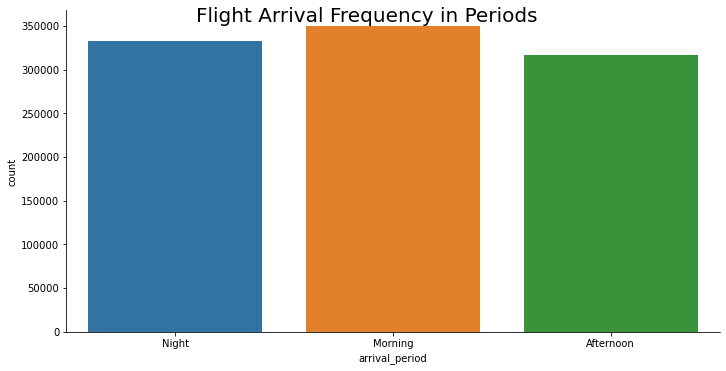

<Figure size 2880x2304 with 0 Axes>

In [129]:
# Plot to show frequency for flight arrival periods
av = sns.catplot( x = "arrival_period", data = train_set.sort_values("arrival_period", ascending = False), kind="count", height = 5, aspect = 2)
av.fig.suptitle("Flight Arrival Frequency in Periods ", size = 20)
plt.figure(figsize = (40,32))
plt.show()

In [130]:
# Calculate average price for flight arrival periods
a_period_data = train_set.groupby(by=['arrival_period'])[["price"]].mean()
a_period_data = a_period_data.reset_index()

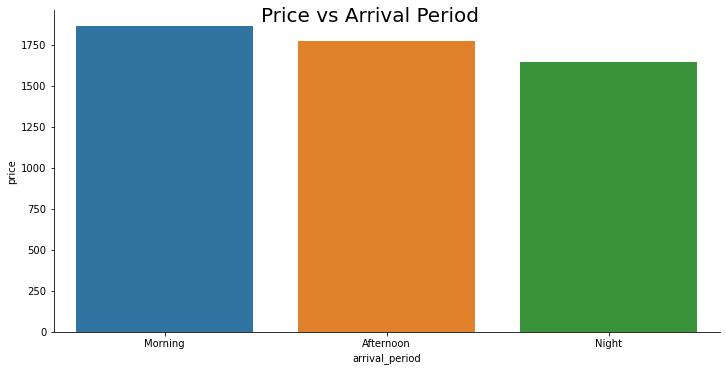

<Figure size 2880x2304 with 0 Axes>

In [131]:
# Plot to show average price for flight arrival periods
av = sns.catplot(y = "price", x = 'arrival_period', data = a_period_data.sort_values("price", ascending = False), kind="bar", height = 5, aspect = 2)
av.fig.suptitle("Price vs Arrival Period", size = 20)
plt.figure(figsize = (40,32))
plt.show()

In [132]:
# Calculate average co2 emissions for departing airlines 
d_airline_co2_emission = train_set.groupby(by=['departure_airline'])[["co2_emissions"]].mean()
d_airline_co2_emission = d_airline_co2_emission.reset_index()

In [133]:
#Only compute airlines with very high CO2 Emission
high_co2_departure_airline = d_airline_co2_emission[d_airline_co2_emission['co2_emissions']>200]

In [134]:
# Calculate average co2 emissions for arriving airlines 
a_airline_co2_emission = train_set.groupby(by=['arrival_airline'])[["co2_emissions"]].mean()
a_airline_co2_emission = a_airline_co2_emission.reset_index()

In [135]:
#Only compute airlines with very high CO2 Emission
high_co2_arrival_airline = a_airline_co2_emission[a_airline_co2_emission['co2_emissions']>150]

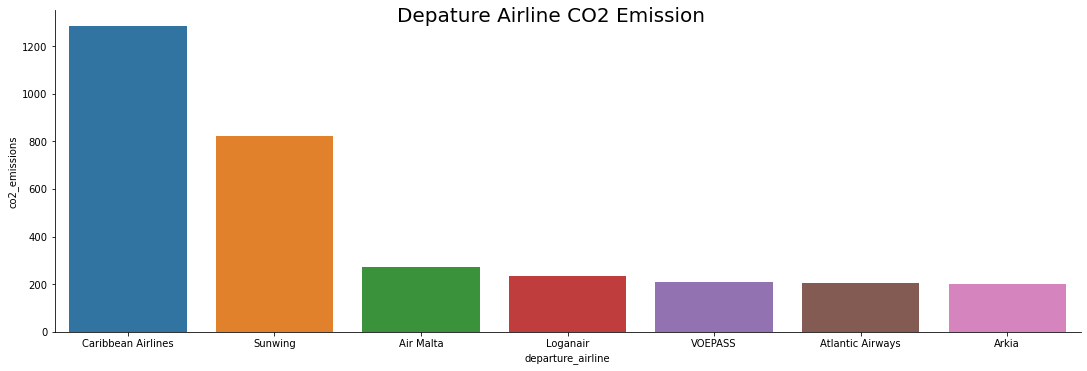

<Figure size 2880x2304 with 0 Axes>

In [136]:
# Plot average CO2 Emission vs Arriving Airlines
av = sns.catplot(y = "co2_emissions", x = 'departure_airline', data = high_co2_departure_airline .sort_values("co2_emissions", ascending = False), kind="bar", height = 5, aspect = 3)
av.fig.suptitle("Depature Airline CO2 Emission", size = 20)
plt.figure(figsize = (40,32))
plt.show()

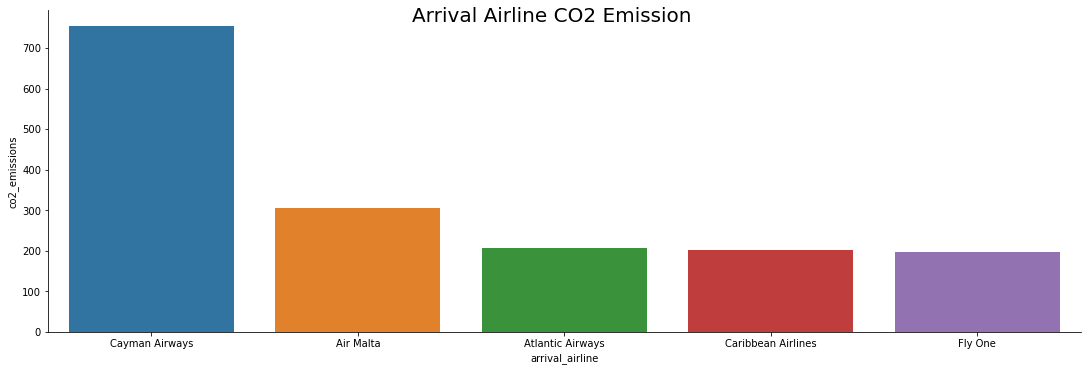

<Figure size 2880x2304 with 0 Axes>

In [137]:
# Plot average CO2 Emission vs Arriving Airlines
av = sns.catplot(y = "co2_emissions", x = 'arrival_airline', data = high_co2_arrival_airline .sort_values("co2_emissions", ascending = False), kind="bar", height = 5, aspect = 3)
av.fig.suptitle("Arrival Airline CO2 Emission", size = 20)
plt.figure(figsize = (40,32))
plt.show()

In [138]:

dep_airline_flights = train_set.groupby(['departure_airline'])[["departure_airline"]].count().rename(columns={'departure_airline':'airline','departure_airline':'flights'})

dep_airline_flights = dep_airline_flights.reset_index()
high_dep_airline_flights = dep_airline_flights[dep_airline_flights['flights'] > 10000]


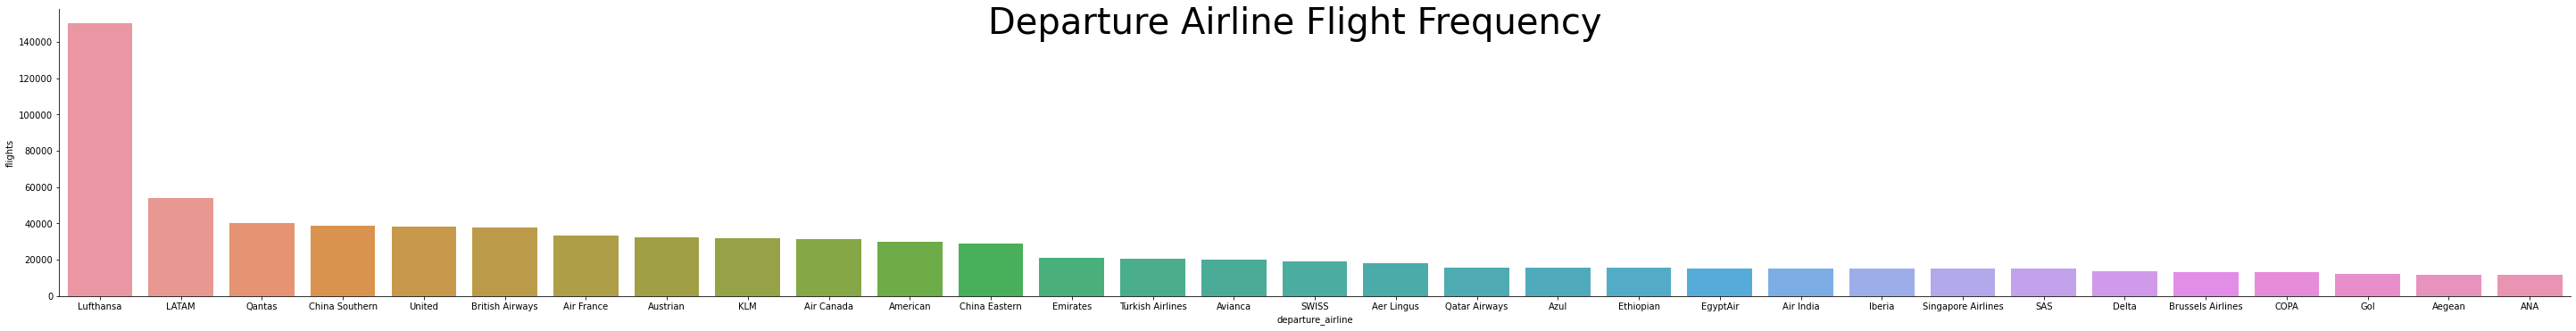

<Figure size 2880x2304 with 0 Axes>

In [139]:
# Plot number of departing flights of each airline
av = sns.catplot(y = "flights", x = "departure_airline", data = high_dep_airline_flights.sort_values("flights", ascending = False), kind="bar", height = 5, aspect = 8)
av.fig.suptitle("Departure Airline Flight Frequency", size = 40)
plt.figure(figsize = (40,32))
plt.show()

In [140]:
arr_airline_flights = train_set.groupby(['arrival_airline'])[["arrival_airline"]].count().rename(columns={'arrival_airline':'airline','arrival_airline':'flights'})

arr_airline_flights  = arr_airline_flights.reset_index()

high_arr_airline_flights = arr_airline_flights[arr_airline_flights['flights'] > 10000]


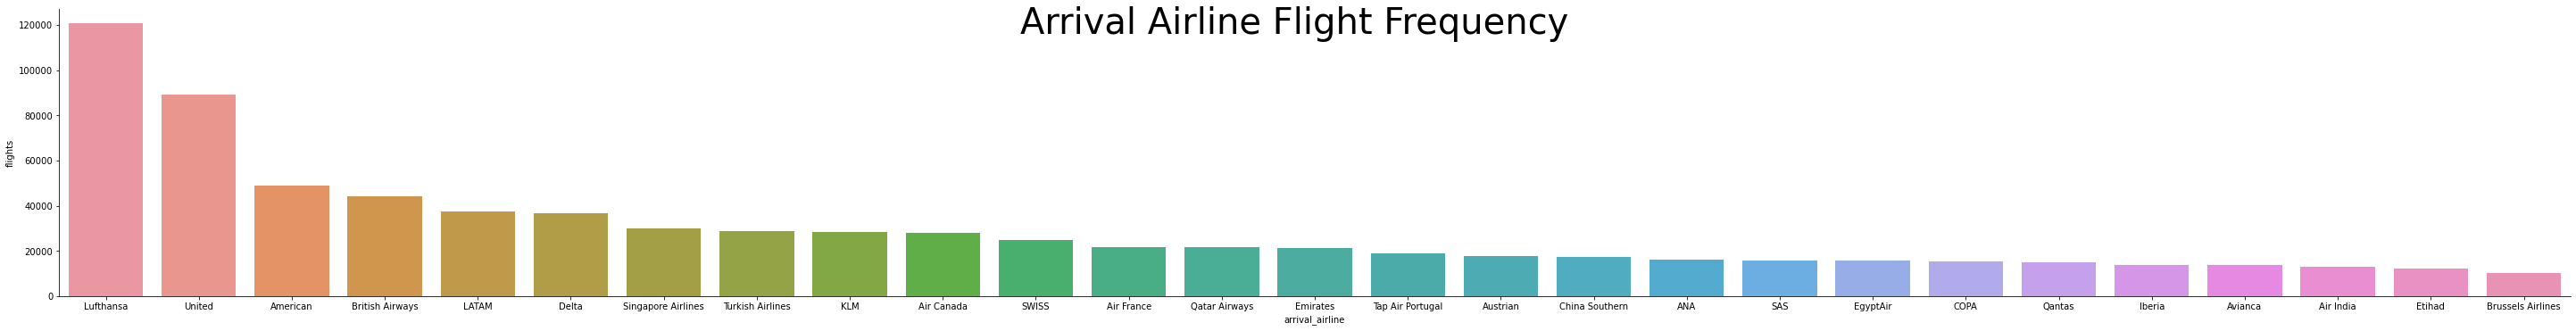

<Figure size 2880x2304 with 0 Axes>

In [141]:
# Plot number of arriving flights of each airline
av = sns.catplot(y = "flights", x = "arrival_airline", data = high_arr_airline_flights.sort_values("flights", ascending = False), kind="bar", height = 5, aspect = 8)
av.fig.suptitle("Arrival Airline Flight Frequency", size = 40)
plt.figure(figsize = (40,32))
plt.show()

In [142]:
flight_paths = train_set.groupby(['flight_path'])[["flight_path"]].count().rename(columns={'flight_path':'path','arrival_airline':'freq'})

flight_paths  = flight_paths.reset_index()

high_flight_paths = flight_paths[flight_paths['path'] > 1100]

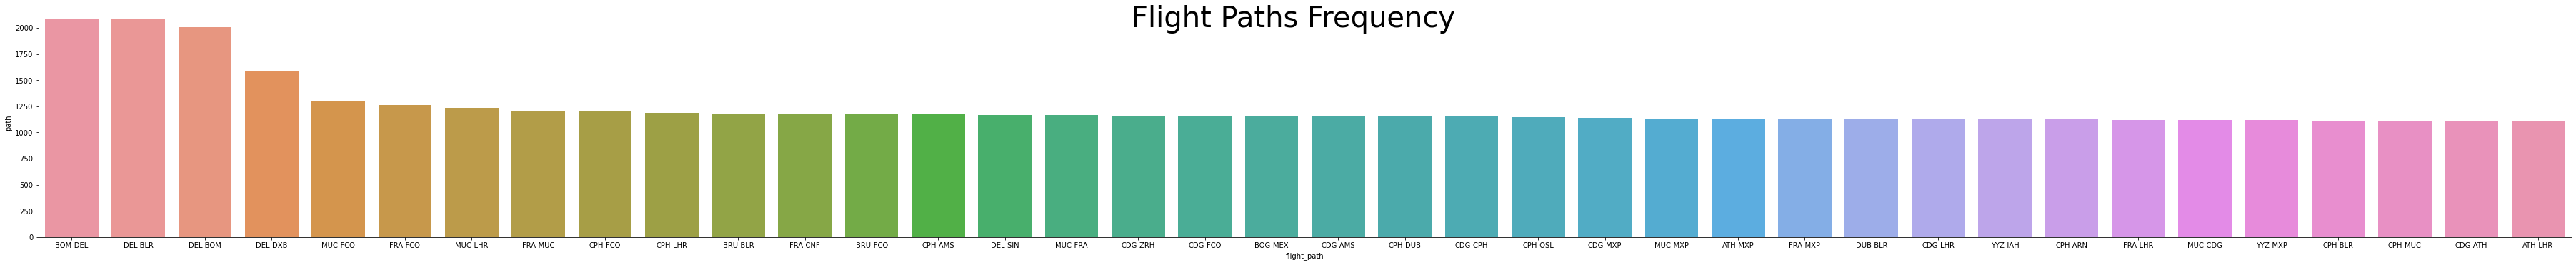

<Figure size 2880x2304 with 0 Axes>

In [143]:
# Plot most frequent flight paths
av = sns.catplot(y = "path", x = "flight_path", data = high_flight_paths.sort_values("path", ascending = False), kind="bar", height = 5, aspect = 10)
av.fig.suptitle("Flight Paths Frequency", size = 40)
plt.figure(figsize = (40,32))
plt.show()

In [144]:
#check for and remove outliers
# check for covariance, correlations
train_set.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 998866 entries, 0 to 998865
Data columns (total 43 columns):
 #   Column                           Non-Null Count   Dtype         
---  ------                           --------------   -----         
 0   from_airport_code                998866 non-null  object        
 1   from_country                     998866 non-null  object        
 2   dest_airport_code                998866 non-null  object        
 3   dest_country                     998866 non-null  object        
 4   aircraft_type                    984952 non-null  object        
 5   airline_number                   998866 non-null  object        
 6   airline_name                     998866 non-null  object        
 7   flight_number                    998866 non-null  object        
 8   arrival_time                     998866 non-null  datetime64[ns]
 9   duration                         998866 non-null  int64         
 10  stops                            998866 non-

In [145]:
# Drop columns not needed for training
train_set.drop(["from_airport_code","from_country", "dest_airport_code", "aircraft_type","dest_country","airline_number","airline_name","flight_number", "arrival_time",
               "currency" , "co2_emissions","avg_co2_emission_for_this_route", "co2_percentage","scan_date","flight_path",
               "airline_names","departure_airline","arrival_airline", "arrival_period", "departure_period"], axis = 1, inplace = True)

In [146]:
#Drop all rows without Price
train_set = train_set[train_set["price"].notna()]
train_set.head()

,duration,stops,price,depature_day,depature_month,departure_hour,departure_min,arrival_day,arrival_month,arrival_hour,...,is_afternoon_departure,is_night_departure,is_morning_arrival,is_afternoon_arrival,is_night_arrival,from_country_freq,dest_country_freq,path_freq,departure_airline_freq,arrival_airline_freq
0,1425,3,1279.0,30,4,14,30,1,5,10,...,1,0,1,0,0,15737,12440,362,33263,37624
1,1425,3,1279.0,30,4,14,30,1,5,10,...,1,0,1,0,0,15737,12440,362,33263,37624
2,1530,3,1284.0,30,4,12,45,1,5,10,...,1,0,1,0,0,15737,12440,362,33263,37624
3,1425,3,1290.0,30,4,14,30,1,5,10,...,1,0,1,0,0,15737,12440,362,33263,37624
4,1540,2,1347.0,30,4,12,35,1,5,10,...,1,0,1,0,0,15737,12440,362,150304,37624


In [147]:
#Compute Z-score of train set
z = np.abs(stats.zscore(train_set))
z

,duration,stops,price,depature_day,depature_month,departure_hour,departure_min,arrival_day,arrival_month,arrival_hour,...,is_afternoon_departure,is_night_departure,is_morning_arrival,is_afternoon_arrival,is_night_arrival,from_country_freq,dest_country_freq,path_freq,departure_airline_freq,arrival_airline_freq
0,0.063248,2.063711,0.243894,1.056988,1.394984,0.210163,0.259542,1.352091,0.630063,0.649581,...,1.581996,0.601350,1.361452,0.680780,0.706371,1.728967,0.638910,1.134198,0.207429,0.039518
1,0.063248,2.063711,0.243894,1.056988,1.394984,0.210163,0.259542,1.352091,0.630063,0.649581,...,1.581996,0.601350,1.361452,0.680780,0.706371,1.728967,0.638910,1.134198,0.207429,0.039518
2,0.085681,2.063711,0.241376,1.056988,1.394984,0.127707,1.100701,1.352091,0.630063,0.649581,...,1.581996,0.601350,1.361452,0.680780,0.706371,1.728967,0.638910,1.134198,0.207429,0.039518
3,0.063248,2.063711,0.238355,1.056988,1.394984,0.210163,0.259542,1.352091,0.630063,0.649581,...,1.581996,0.601350,1.361452,0.680780,0.706371,1.728967,0.638910,1.134198,0.207429,0.039518
4,0.099864,0.527477,0.209654,1.056988,1.394984,0.127707,0.539929,1.352091,0.630063,0.649581,...,1.581996,0.601350,1.361452,0.680780,0.706371,1.728967,0.638910,1.134198,2.280306,0.039518
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
998861,0.190901,1.008758,0.224760,1.456967,0.560385,1.054840,0.301230,1.267185,0.630063,1.342535,...,0.632113,1.662926,0.734510,0.680780,1.415686,0.233184,0.364067,2.270671,0.466892,0.471377
998862,0.446206,1.008758,0.224760,1.456967,0.560385,1.561646,0.301230,1.267185,0.630063,1.342535,...,0.632113,1.662926,0.734510,0.680780,1.415686,0.233184,0.364067,2.270671,0.466892,0.471377
998863,0.028946,0.527477,0.219221,1.456967,0.560385,1.479190,0.539929,1.267185,0.630063,0.815591,...,0.632113,0.601350,1.361452,0.680780,0.706371,0.233184,0.364067,2.270671,0.714834,0.924689
998864,0.319711,0.527477,0.199080,1.456967,0.560385,1.141319,0.862003,1.267185,0.630063,0.014458,...,0.632113,0.601350,0.734510,1.468903,0.706371,0.233184,0.364067,2.270671,0.589364,0.916313


In [148]:
#Check for outliers
threshold = 3
print(np.where(z > 3))

(array([    89,     91,     92, ..., 995251, 995253, 997480], dtype=int64), array([0, 0, 0, ..., 2, 2, 2], dtype=int64))


In [149]:
#Removing outliers
train_set_o = train_set[(z < 3).all(axis=1)]

In [150]:
train_set.shape

(997513, 23)

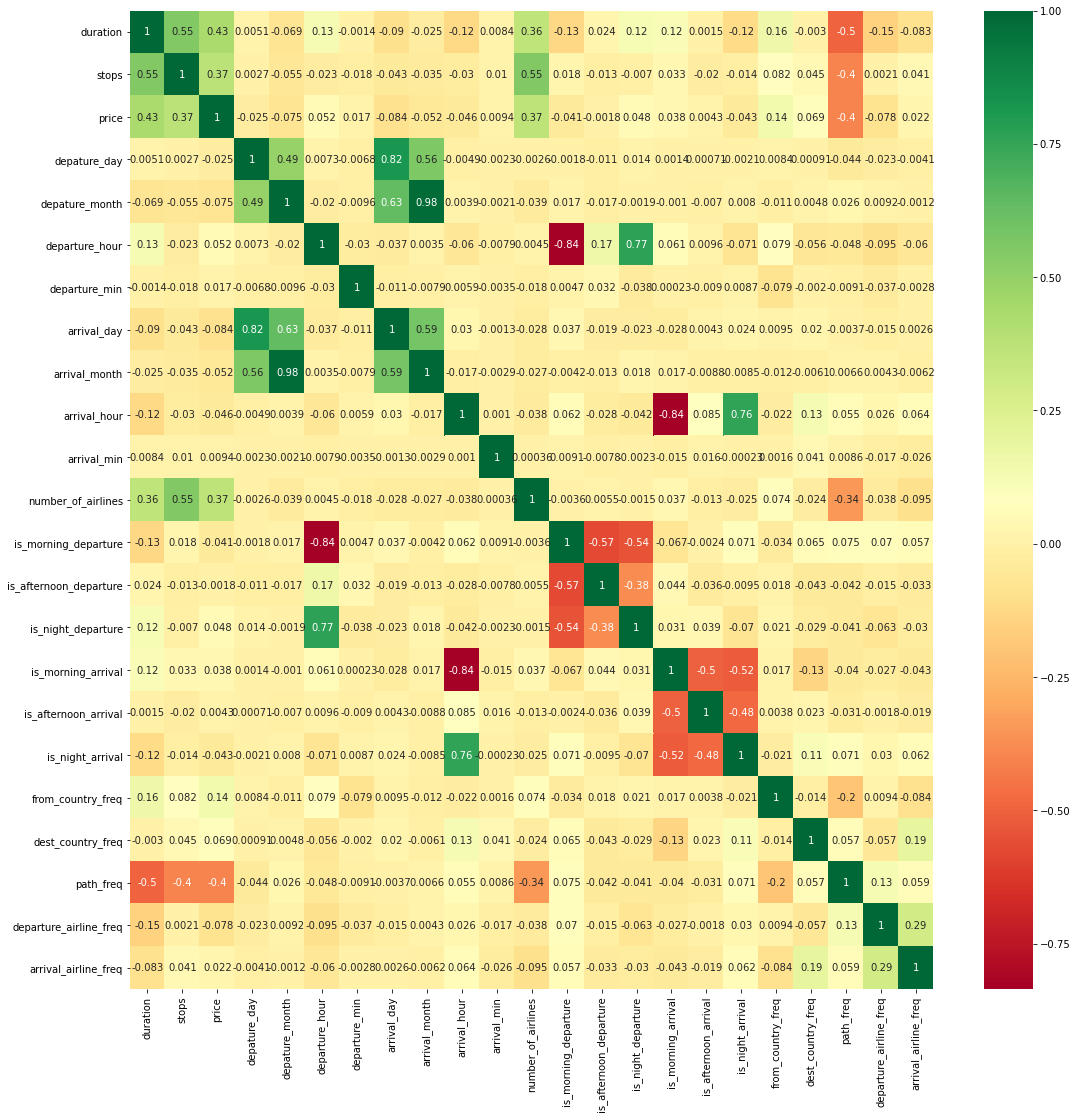

In [151]:
#Plot correlation matrix
plt.figure(figsize = (18,18))
sns.heatmap(train_set.corr(), annot = True, cmap = "RdYlGn")

plt.show()

In [152]:
X = train_set_o.drop('price',1)

C:\Users\USER\AppData\Local\Temp/ipykernel_2880/1446841545.py:1: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only
  X = train_set_o.drop('price',1)


In [153]:
X

,duration,stops,depature_day,depature_month,departure_hour,departure_min,arrival_day,arrival_month,arrival_hour,arrival_min,...,is_afternoon_departure,is_night_departure,is_morning_arrival,is_afternoon_arrival,is_night_arrival,from_country_freq,dest_country_freq,path_freq,departure_airline_freq,arrival_airline_freq
0,1425,3,30,4,14,30,1,5,10,15,...,1,0,1,0,0,15737,12440,362,33263,37624
1,1425,3,30,4,14,30,1,5,10,15,...,1,0,1,0,0,15737,12440,362,33263,37624
2,1530,3,30,4,12,45,1,5,10,15,...,1,0,1,0,0,15737,12440,362,33263,37624
3,1425,3,30,4,14,30,1,5,10,15,...,1,0,1,0,0,15737,12440,362,33263,37624
4,1540,2,30,4,12,35,1,5,10,15,...,1,0,1,0,0,15737,12440,362,150304,37624
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
998861,1335,1,1,5,19,20,2,5,22,5,...,0,1,0,0,1,62566,33374,32,21056,21177
998862,1155,1,1,5,22,20,2,5,22,5,...,0,1,0,0,1,62566,33374,32,21056,21177
998863,1490,2,1,5,4,35,2,5,9,55,...,0,0,1,0,0,62566,33374,32,9391,3913
998864,1695,2,1,5,6,10,2,5,14,55,...,0,0,0,1,0,62566,33374,32,15294,4232


In [154]:
#Seperate target variable
y = train_set_o['price']

In [155]:
y

0         1279.0
1         1279.0
2         1284.0
3         1290.0
4         1347.0
           ...  
998861    1317.0
998862    1317.0
998863    1328.0
998864    1368.0
998865    1368.0
Name: price, Length: 958753, dtype: float64

In [156]:
from sklearn.ensemble import ExtraTreesRegressor
selection = ExtraTreesRegressor()
selection.fit(X, y)

ExtraTreesRegressor()

In [157]:
print(selection.feature_importances_)

[0.14659473 0.06298813 0.02375016 0.01426548 0.03576606 0.03390321
 0.03181719 0.01103935 0.03156522 0.03000403 0.09786671 0.00896897
 0.00860731 0.01059331 0.01017945 0.00871881 0.00830278 0.0940017
 0.06366823 0.12822914 0.06528853 0.07388149]


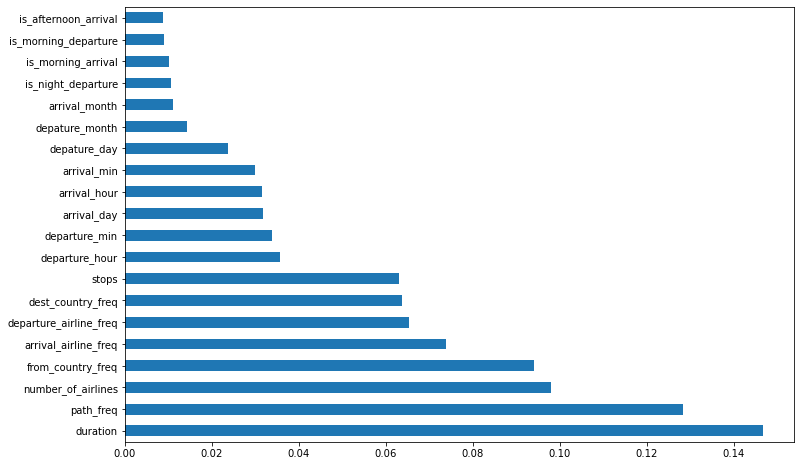

In [158]:
#Plot feature importance 
plt.figure(figsize = (12,8))
feat_importances = pd.Series(selection.feature_importances_, index=X.columns)
feat_importances.nlargest(20).plot(kind='barh')
plt.show()

In [159]:
# Split dataset into train and test sets
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 42, shuffle = True)

In [160]:
#Scaling data to standard range
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
sc.fit(X_train)
X_train_std = sc.transform(X_train)
X_test_std = sc.transform(X_test)
y_train = np.array(y_train)

In [161]:
X_train_std

array([[-0.44866273, -1.01528701,  0.79524413, ...,  0.02328899,
        -0.25765238,  1.30746591],
       [ 2.36121062,  0.58552039,  0.96881918, ...,  0.0839223 ,
        -0.06998937, -0.69523468],
       [ 1.40449771, -1.01528701, -1.28765648, ..., -0.01081724,
        -0.58976211, -0.46666089],
       ...,
       [-1.26224536, -1.01528701, -1.0272939 , ...,  1.29658839,
        -0.23591811,  2.13650128],
       [ 0.91484149,  0.58552039,  0.88203165, ..., -1.61002065,
        -0.48899413, -0.04518456],
       [ 0.55324921,  0.58552039,  0.96881918, ...,  0.12939728,
        -0.23591811, -0.88140136]])

In [162]:
#from sklearn.svm import SVR

In [163]:
#regressor = SVR(kernel='rbf')
#regressor.fit(X_train_std,y_train)

In [164]:
#from sklearn import decomposition, datasets
#pca = decomposition.PCA(n_components=6)

#X_train_pca = pca.fit_transform(X_train_std)
#print(X_train_pca.shape)
#print(X_train_pca)

In [165]:
#X_test_pca = pca.transform(X_test_std)

In [166]:
from sklearn.model_selection import RandomizedSearchCV
from xgboost import XGBRegressor

In [167]:
#Train the base model on the data
xgbr = XGBRegressor(seed = 13, tree_method = "hist")
xgbr.fit(X_train_std, y_train)
display(xgbr.score(X_train_std, y_train))

0.7030630575027024

In [168]:
# Number of trees in random forest
n_estimators = [int(x) for x in np.linspace(start = 100, stop = 1200, num = 12)]
# Number of features to consider at every split
max_features = ['auto', 'sqrt']
# Maximum number of levels in tree
max_depth = [int(x) for x in np.linspace(5, 30, num = 6)]
# Minimum number of samples required to split a node
min_samples_split = [2, 5, 10, 15, 100]
# Minimum number of samples required at each leaf node
min_samples_leaf = [1, 2, 5, 10]

learning_rate = [0.01, 0.1, 0.2, 0.3]
max_bin = [256, 512, 1024]
gamma = [0, 0.5, 1, 1.5, 2, 5]

In [169]:
#Hyper-tuning parameters of the model

hyper_params = {'max_depth': [9,10,11,12,13],
                'n_estimators':n_estimators,
                'gamma': [0, 0.5, 1, 1.5, 2, 5], 
                'subsample': [0.6, 0.7, 0.8, 0.9, 1], 
                'colsample_bytree': [0.5, 0.6, 0.7, 0.8, 0.9, 1], 
                'learning_rate': [0.01, 0.1, 0.2, 0.3],
                'max_bin' : [256, 512, 1024]
               }
xgb_reg = RandomizedSearchCV(estimator = xgbr, 
                   param_distributions = hyper_params,
                   n_iter = 2, #500
                   scoring = 'neg_root_mean_squared_error',
                   random_state=42,
                   verbose=3)



In [170]:
#Training the model using the tuned parameters
xgb_reg.fit(X_train_std, y_train)

print("Best parameters:", xgb_reg.best_params_)
print("Lowest RMSE: ", -xgb_reg.best_score_)

Fitting 5 folds for each of 2 candidates, totalling 10 fits
[CV 1/5] END colsample_bytree=1, gamma=1.5, learning_rate=0.3, max_bin=512, max_depth=11, n_estimators=800, subsample=0.9;, score=-476.905 total time= 3.2min
[CV 2/5] END colsample_bytree=1, gamma=1.5, learning_rate=0.3, max_bin=512, max_depth=11, n_estimators=800, subsample=0.9;, score=-476.499 total time= 3.1min
[CV 3/5] END colsample_bytree=1, gamma=1.5, learning_rate=0.3, max_bin=512, max_depth=11, n_estimators=800, subsample=0.9;, score=-477.268 total time= 3.0min
[CV 4/5] END colsample_bytree=1, gamma=1.5, learning_rate=0.3, max_bin=512, max_depth=11, n_estimators=800, subsample=0.9;, score=-475.482 total time= 3.1min
[CV 5/5] END colsample_bytree=1, gamma=1.5, learning_rate=0.3, max_bin=512, max_depth=11, n_estimators=800, subsample=0.9;, score=-477.751 total time= 3.0min
[CV 1/5] END colsample_bytree=0.5, gamma=2, learning_rate=0.1, max_bin=512, max_depth=12, n_estimators=400, subsample=0.6;, score=-478.651 total time=

In [171]:
from sklearn import metrics 

In [172]:
xgb = XGBRegressor(seed = 13, 
    tree_method = "hist", #gpu_hist
    subsample = 0.9,
    max_depth = 11,
    learning_rate = 0.3,
    gamma = 1.5,
    colsample_bytree = 1,
    n_estimators = 800,
    max_bin = 512
    )
xgb.fit(
    X_train_std, y_train,
    eval_metric="rmse",
    eval_set=[(X_train_std, y_train), (X_test_std, y_test)],
    verbose=True,
    early_stopping_rounds = 10
    )



[0]	validation_0-rmse:1584.32886	validation_1-rmse:1581.22693
[1]	validation_0-rmse:1276.70019	validation_1-rmse:1275.35535
[2]	validation_0-rmse:1080.77148	validation_1-rmse:1081.66455
[3]	validation_0-rmse:962.22290	validation_1-rmse:965.76166
[4]	validation_0-rmse:883.22656	validation_1-rmse:889.60339
[5]	validation_0-rmse:835.20020	validation_1-rmse:843.42224
[6]	validation_0-rmse:794.22345	validation_1-rmse:805.11975
[7]	validation_0-rmse:770.48950	validation_1-rmse:783.81628
[8]	validation_0-rmse:751.72363	validation_1-rmse:767.62640
[9]	validation_0-rmse:730.80780	validation_1-rmse:749.05676
[10]	validation_0-rmse:718.09058	validation_1-rmse:737.98389
[11]	validation_0-rmse:707.53552	validation_1-rmse:728.87964
[12]	validation_0-rmse:686.46491	validation_1-rmse:711.08722
[13]	validation_0-rmse:676.78687	validation_1-rmse:703.18243
[14]	validation_0-rmse:669.14203	validation_1-rmse:696.43683
[15]	validation_0-rmse:656.79999	validation_1-rmse:686.03925
[16]	validation_0-rmse:649.9

[134]	validation_0-rmse:339.72464	validation_1-rmse:486.45380
[135]	validation_0-rmse:338.27057	validation_1-rmse:485.79257
[136]	validation_0-rmse:337.54224	validation_1-rmse:485.54736
[137]	validation_0-rmse:336.34802	validation_1-rmse:485.12445
[138]	validation_0-rmse:334.69275	validation_1-rmse:484.13709
[139]	validation_0-rmse:333.54956	validation_1-rmse:483.76401
[140]	validation_0-rmse:332.64682	validation_1-rmse:483.37354
[141]	validation_0-rmse:331.49823	validation_1-rmse:482.92767
[142]	validation_0-rmse:330.53650	validation_1-rmse:482.58661
[143]	validation_0-rmse:329.14047	validation_1-rmse:482.02753
[144]	validation_0-rmse:328.03159	validation_1-rmse:481.78091
[145]	validation_0-rmse:326.90631	validation_1-rmse:481.35953
[146]	validation_0-rmse:325.62335	validation_1-rmse:480.90430
[147]	validation_0-rmse:324.37799	validation_1-rmse:480.49750
[148]	validation_0-rmse:323.20520	validation_1-rmse:480.31439
[149]	validation_0-rmse:322.08798	validation_1-rmse:479.95056
[150]	va

[267]	validation_0-rmse:245.56311	validation_1-rmse:458.35703
[268]	validation_0-rmse:245.15430	validation_1-rmse:458.23492
[269]	validation_0-rmse:244.68373	validation_1-rmse:458.04251
[270]	validation_0-rmse:244.13359	validation_1-rmse:458.00845
[271]	validation_0-rmse:243.73881	validation_1-rmse:457.95547
[272]	validation_0-rmse:243.40622	validation_1-rmse:457.93814
[273]	validation_0-rmse:243.00087	validation_1-rmse:457.82455
[274]	validation_0-rmse:242.66679	validation_1-rmse:457.76608
[275]	validation_0-rmse:242.16509	validation_1-rmse:457.64285
[276]	validation_0-rmse:241.76192	validation_1-rmse:457.52502
[277]	validation_0-rmse:241.27199	validation_1-rmse:457.45844
[278]	validation_0-rmse:240.79855	validation_1-rmse:457.33057
[279]	validation_0-rmse:240.39133	validation_1-rmse:457.17654
[280]	validation_0-rmse:240.19559	validation_1-rmse:457.10941
[281]	validation_0-rmse:239.73599	validation_1-rmse:456.99036
[282]	validation_0-rmse:239.22816	validation_1-rmse:456.91232
[283]	va

[400]	validation_0-rmse:199.72443	validation_1-rmse:450.52200
[401]	validation_0-rmse:199.48419	validation_1-rmse:450.48550
[402]	validation_0-rmse:198.99474	validation_1-rmse:450.40659
[403]	validation_0-rmse:198.69992	validation_1-rmse:450.39877
[404]	validation_0-rmse:198.41173	validation_1-rmse:450.37891
[405]	validation_0-rmse:198.16940	validation_1-rmse:450.38052
[406]	validation_0-rmse:197.92094	validation_1-rmse:450.37405
[407]	validation_0-rmse:197.61381	validation_1-rmse:450.33441
[408]	validation_0-rmse:197.36708	validation_1-rmse:450.29395
[409]	validation_0-rmse:197.21129	validation_1-rmse:450.26907
[410]	validation_0-rmse:197.01979	validation_1-rmse:450.21439
[411]	validation_0-rmse:196.70756	validation_1-rmse:450.17010
[412]	validation_0-rmse:196.50282	validation_1-rmse:450.17462
[413]	validation_0-rmse:196.09543	validation_1-rmse:450.10019
[414]	validation_0-rmse:195.80307	validation_1-rmse:450.08807
[415]	validation_0-rmse:195.54555	validation_1-rmse:450.03912
[416]	va

[533]	validation_0-rmse:174.51743	validation_1-rmse:447.89603
[534]	validation_0-rmse:174.46951	validation_1-rmse:447.89807
[535]	validation_0-rmse:174.33116	validation_1-rmse:447.89218
[536]	validation_0-rmse:174.20309	validation_1-rmse:447.87125
[537]	validation_0-rmse:174.11151	validation_1-rmse:447.86996
[538]	validation_0-rmse:174.03204	validation_1-rmse:447.85852
[539]	validation_0-rmse:173.84174	validation_1-rmse:447.85413
[540]	validation_0-rmse:173.61089	validation_1-rmse:447.79688
[541]	validation_0-rmse:173.44807	validation_1-rmse:447.80512
[542]	validation_0-rmse:173.38544	validation_1-rmse:447.80084
[543]	validation_0-rmse:173.26422	validation_1-rmse:447.77911
[544]	validation_0-rmse:173.20648	validation_1-rmse:447.77817
[545]	validation_0-rmse:173.06607	validation_1-rmse:447.73358
[546]	validation_0-rmse:172.95441	validation_1-rmse:447.73840
[547]	validation_0-rmse:172.83223	validation_1-rmse:447.75101
[548]	validation_0-rmse:172.74300	validation_1-rmse:447.71832
[549]	va

XGBRegressor(base_score=0.5, booster='gbtree', colsample_bylevel=1,
             colsample_bynode=1, colsample_bytree=1, enable_categorical=False,
             gamma=1.5, gpu_id=-1, importance_type=None,
             interaction_constraints='', learning_rate=0.3, max_bin=512,
             max_delta_step=0, max_depth=11, min_child_weight=1, missing=nan,
             monotone_constraints='()', n_estimators=800, n_jobs=4,
             num_parallel_tree=1, predictor='auto', random_state=13,
             reg_alpha=0, reg_lambda=1, scale_pos_weight=1, seed=13,
             subsample=0.9, tree_method='hist', validate_parameters=1,
             verbosity=None)

In [173]:
#Checking R2 evaluation score
metrics.r2_score(y_test, y_pred2)

0.8894018770227295

In [174]:
#Standardized RMSE score
447.68124/(max(y)-min(y))

0.05804995331950207

In [175]:
display(xgb.score(X_train_std, y_train))

0.9837876557576284

In [176]:
#Predict on the test set
y_pred2 = xgb.predict(X_test_std)

C:\Users\USER\anaconda3\envs\tensorflow_env\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


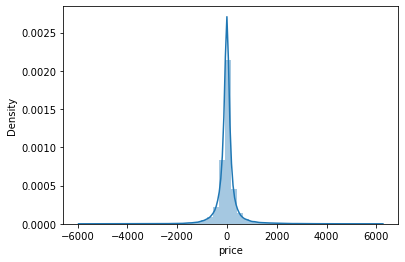

In [177]:
sns.distplot(y_test-y_pred2)
plt.show()

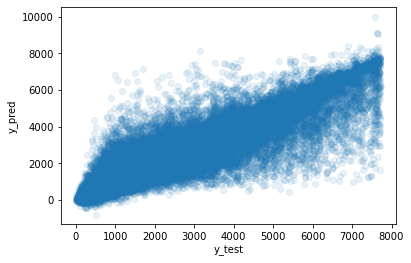

In [178]:
plt.scatter(y_test, y_pred2, alpha = 0.1)
plt.xlabel("y_test")
plt.ylabel("y_pred")
plt.show()

In [179]:
#saving the model to file
filename = 'finalized_model.sav'
pickle.dump(xgb, open(filename, 'wb'))